In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
path = os.getcwd()

# Machine learning topics

- Academics tend to use SVM
- Industry tends to use Logistic regressions

# 1. Linear classifiers

Seperate object classes

$$x^T w =0$$

## 1.1 Python example: Linear classifiers

### 1.1.1 Importing dataset from sklearn 

#### 1.1.1.1 User function: convert sklearn data $\rightarrow$ dataframe

In [3]:
def to_df(dataset):
    df = pd.DataFrame(dataset.data, columns= dataset.feature_names)
    df['target'] = pd.Series(dataset.target)
    df['target_cat'] = pd.Categorical.from_codes(dataset.target, dataset.target_names)
    return df

#### 1.1.1.2 Import breast cancer data set with user created fucntion

In [4]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
#User created function
cancer_df = to_df(cancer)

cancer_df.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,target_cat
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0,malignant
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0,malignant


### 1.1.2 Predict cancer with 3 linear classifiers

#### 1.1.2.1 Create arrays for two features and target

In [5]:
X_twofeatures = cancer_df[['mean radius','mean texture']]
y = cancer_df.target.values.reshape(-1,1)

#### 1.1.2.2  User function: Predict label (cancer or not) with 3 classifiers:
1. SVM
2. Logistic regression
3. K-neighbors

In [6]:
def LinearClass(X,y, classifier, split=False):
    fit = eval(linear_class + "().fit(X_twofeatures, y)")
    X_twofeatures['Predict'] = fit.fit(X_twofeatures, y).predict(X_twofeatures)
    sns.scatterplot('mean radius','mean texture', data=X_twofeatures, hue='Predict')

#### 1.1.2.3. Input X_twofeatures and y (1.1.2.1) to user function for all three classifiers

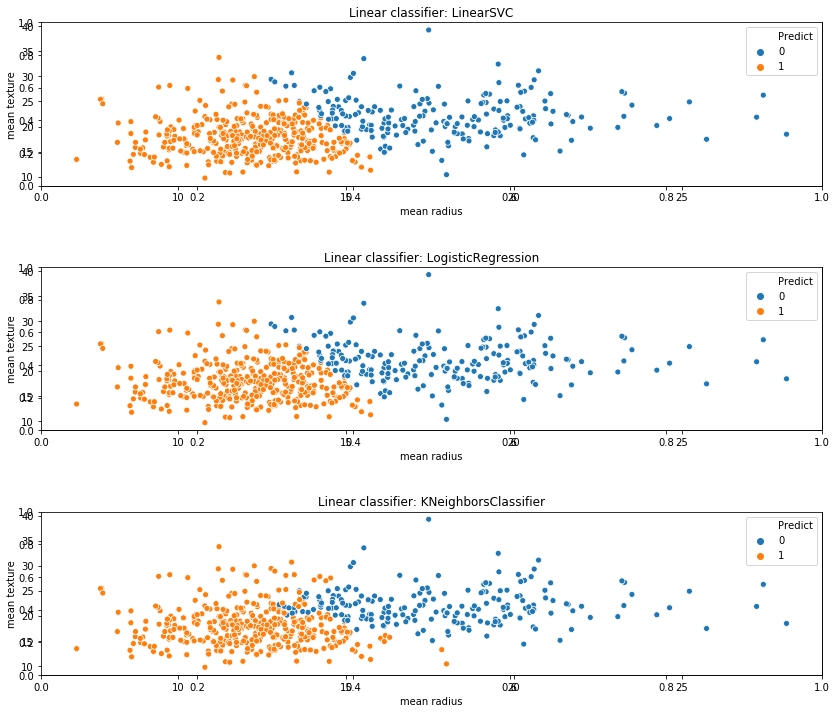

In [7]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

fig, ax = plt.subplots(3, figsize=(14,12))
classifiers = ['LinearSVC', 'LogisticRegression', 'KNeighborsClassifier']
for idx, linear_class in enumerate(classifiers):
    fig.add_subplot(3, 1, idx+1)
    fig.subplots_adjust(hspace=.5)
    LinearClass(X_twofeatures, y, linear_class)
    plt.title('Linear classifier: ' + str(linear_class))

## 1.1 Support vector machine

Chooses the line which maximizes the "margin"

Margin width = $\frac{1}{||w||}$

Upper margin: $x^T w =1$
Lower margin: $x^T w =-1$
- Changes the y int

- The margin width depends on the norm of w. 
- If w is tiny then you need to change x a lot to get $x^T$ from 0 to 1



### 1.1.1 Python example
Created by [Pythonprogramming](https://pythonprogramming.net/support-vector-machine-intro-machine-learning-tutorial/)

In [8]:
#Import oop module
sys.path.append(path+'/Modules')
from L3_SVM import *

In [9]:
data_dict = {-1:np.array([[1,7],
                          [2,8],
                          [3,8],]),
             
             1:np.array([[5,1],
                         [6,-1],
                         [7,3],])}

svm = Support_Vector_Machine(visualization=False)
svm.fit(data=data_dict)

Optimized a step.
Optimized a step.
Optimized a step.
[1 7] : 1.271999999999435
[2 8] : 1.271999999999435
[3 8] : 1.0399999999995864
[5 1] : 1.0479999999990506
[ 6 -1] : 1.7439999999985962
[7 3] : 1.0479999999990506


### 1.1.1 Hinge loss

$$\sum_i h(x_i^T w)$$

For class 1:
$\sum_i h(x_i^T w)$

For class -1:
$\sum_i h(-x_i^T w)$

In general:
$\sum_i h (y_i * x_i^T w)$

Combined objective:

$$min \frac{1}{2} ||w||^2 + h(\hat{X} w)$$


In [10]:
from sklearn.metrics import hinge_loss
from sklearn import svm
X = cancer_df[['mean radius','mean texture']]
y = cancer_df.target.values
est= svm.LinearSVC()
est.fit(X,y)
predict = est.decision_function(X)
hinge_loss(y, predict)

0.397715597141363

## 1.2 Logistic regression
- Industry prefers more than academics
- Similar to hinge but more smooth

$$f(z) =\frac{e^z}{1+e^z}$$

$$p[y=1]= \frac{e^{x^T w}}{1+e^{x^T w}} \\
p[y=-1]= 1-\frac{e^{x^T w}}{1+e^{x^T w}}= \frac{1}{1+e^{x^T w}}$$


### 1.2.1 Python example: Logistic regression by hand
User created
#### 1.2.1.1 Fit model

In [11]:
#Import oop module
sys.path.append(path+'/Modules')
from L3_Linear import *

#Import data
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_cancer = cancer.data[:,:2] #First two columns
y_cancer = cancer.target

#Fit model from imported module
model = LogisticRegression(verbose=True)
model.fit(X_cancer, y_cancer)

Iteration 0
 Gradient: [-0.56 -1.6 ], Loss: 0.693, Theta: [0.06 0.16]

Iteration 250
 Gradient: [-5.81 -7.5 ], Loss: 3.908, Theta: [-1.8   2.09]

Iteration 500
 Gradient: [-5.8 -7.5], Loss: 3.909, Theta: [-1.8   2.09]



In [12]:
Model_weights = model.theta
Model_weights 

array([-1.80453427,  2.08825091])

#### 1.2.1.2 Predict label

$$p(y_i=1|x_i)=\sigma(x_i w)=\frac{e^{x_i w}}{1+e^{e^x_i w}}$$

In [13]:
df_cancer = to_df(cancer)
prob, predict = model.predict(X_cancer)
df_cancer['Probability'] = pd.Series(prob)
df_cancer['Prediction'] = pd.Series(predict)
df_cancer.loc[:,['mean radius', 'mean texture', 'target', 'Probability','Prediction']].head(4)

,mean radius,mean texture,target,Probability,Prediction
0,17.99,10.38,0,0.000021,0
1,20.57,17.77,0,0.497237,0
2,19.69,21.25,0,0.999856,1
3,11.42,20.38,0,1.000000,1


In [14]:
#The model in 1.2.1.2 yields the same as are user generated function
prob_y = (np.exp(X_cancer@Model_weights ))/(1+np.exp(X_cancer@Model_weights))
prob_y[:3]

array([2.06551109e-05, 4.97237199e-01, 9.99855784e-01])

#### 1.2.1.1.2.1 Predicted labels are different than Sklearn model

In [15]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0).fit(X_cancer, y_cancer)
df_cancer['Prediction_sklearn'] = pd.Series(pd.Series(clf.predict(X_cancer)))
diff = ((df_cancer.Prediction == df_cancer.Prediction_sklearn)*1).mean()
print('{:.2%} of Sklearn & User generated labels match'.format(diff))

67.14% of Sklearn & User generated labels match


#### 1.2.1.3 Evaluate model

In [16]:
from sklearn.metrics import confusion_matrix
def user_confusion(actual, predicted):
    df = pd.DataFrame(confusion_matrix(actual, predicted), index=['Acutal neg', 'Actual pos'], columns=['Pred neg', 'Pred pos'])
    true_neg, false_pos, false_neg, true_pos = df.iloc[0,0], df.iloc[1,0],df.iloc[0,1],df.iloc[1,1]
    
    precision = (true_pos)/(true_pos+false_pos)
    recall = (true_pos)/(true_pos+false_neg)
    F1 = (2*precision*recall)/(precision+recall)
    accuracy = (true_pos+true_neg)/(true_pos+false_neg+true_neg+false_pos)

    print(df)
    variables = [precision, recall, F1, accuracy]
    varnames = ['Precision', 'Recall', 'F1', 'Accuracy']
    for var,varn in zip(variables, varnames):
        print(str(varn)+": {}".format(round(var,2)))    
    
user_confusion(df_cancer.target.values, df_cancer.Prediction.values)
#from sklearn.metrics import classification_report,confusion_matrix
#print(confusion_matrix(df_cancer.Prediction.values,df_cancer.target.values))
#print(classification_report(df_cancer.Prediction.values,df_cancer.target.values))

            Pred neg  Pred pos
Acutal neg        14       198
Actual pos         5       352
Precision: 0.99
Recall: 0.64
F1: 0.78
Accuracy: 0.64


#### 1.2.1.4 Graph evaluation of model

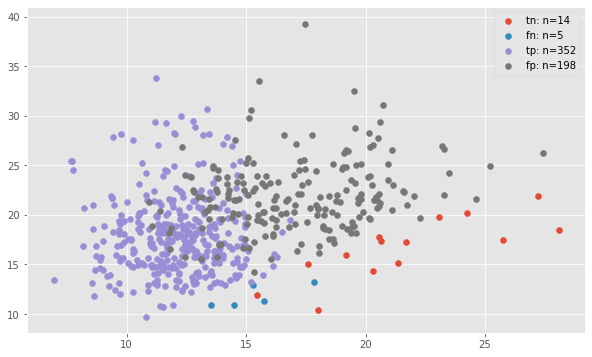

In [17]:
plt.figure(figsize=(10, 6))
tn = (df_cancer.target==0) & (df_cancer.Prediction==0)
fn = (df_cancer.target==1) & (df_cancer.Prediction==0)
tp = (df_cancer.target==1) & (df_cancer.Prediction==1) 
fp = (df_cancer.target==0) & (df_cancer.Prediction==1)
for data, name in zip([tn,fn,tp,fp], ['tn','fn','tp', 'fp']):
    plt.scatter(df_cancer.loc[data, 'mean radius'], df_cancer.loc[data, 'mean texture'], label=str(name)+': n='+str(len(df_cancer.loc[data, 'mean texture'])))
    plt.legend()

### 1.2.1 Likelihood functions

Probability of observing label given data

Observed y=1
$$NLL(x) = log(1+e^{x^T w})-x^T w$$


Observed y=-1
$$NLL(x) = log(1+e^{x^T w})$$


#### 1.2.1.1 Python example: Likelihood function

In [18]:
def nll(x, weight):
    y_p1 = np.log(1+np.exp(x@weight))-(x@weight)
    y_n1 = np.log(1+np.exp(x@weight))
    return y_p1, y_n1

nll_pos, nll_neg = nll(X_cancer,model.theta)
df_cancer['nll_pos'] = pd.Series(np.round(nll_pos,4))
df_cancer['nll_neg '] = pd.Series(np.round(nll_neg,4))
df_cancer.iloc[:,-5:].head(5)

,Probability,Prediction,Prediction_sklearn,nll_pos,nll_neg
0,0.000021,0,0,10.7875,0.0000
1,0.497237,0,0,0.6987,0.6876
2,0.999856,1,0,0.0001,8.8442
3,1.000000,1,1,0.0000,21.9508
4,0.001269,0,0,6.6698,0.0013


### 1.2.2 Maximum Likelihood estimator

$$\sum_{k=1} log(1+exp(-y_k\dot x_k w))) = f_{lr}(YXw)$$

### 1.2.3. Non-negative matrix factorization
$$E(X,Y) = \frac{1}{2}||XY-S||^2\\
\partial_y E = X^T(XY-S)\\
\partial_x E = (XY-S)Y^T$$

# 2. Neural Networks

## 2.1 Description & underlying mathmatics
Easiest way to interpretation: Logistic regression on steroids

Multilayer perception:

$$\sigma(\sigma(\sigma(x_i W_1)W_2)W_3) = y_3$$

Where: 
- $\sigma$= sigmoid, relu, etc
- $x_i$= row vectors

### 2.1.1 Derivatives

In optimization variables are column vectors while derivatives are rows

$$\begin{bmatrix} \text{---} & Df & \text{---} \end{bmatrix} \begin{bmatrix} \vert \\x \\ \vert\end{bmatrix}$$

The derivative is the jacobian

If the function is singled valued:
$$Df =(d_{x_1}f d_{x_2}f d_{x_3}f)$$

If the function has multiple values:

$$Df = \begin{pmatrix}d_{x_1}  f_1& d_{x_2} f_2& d_{x_3}f_3 \\ d_{x_1} f_1 & d_{x_2} f_2 &d_{x_3}f_3 \\ d_{x_1} f_3 &d_{x_2} f_2& d_{x_3}f_3 \end{pmatrix}$$



### 2.1.2 Gradients:
- Adjoint of the derivative
- The derivative of A then the adjoint of the jacobian

$$Df = (\partial_{x1}f \partial_{x2}f\partial_{x3}f) \\ \nabla f =\begin{pmatrix} \partial_{x1}f \\ \partial_{x2}f \\ \partial_{x3}f\end{pmatrix}$$

Better definition: 
The gradient of a scalar valued function is a matrix of derivatives that is the sampe shape as the unknowns

$$x = \begin{pmatrix}x_{11} & x_{12}& x_{13}\\x_{21} & x_{22} & x_{23} \\ x_{31}&x_{32}&x_{33}\end{pmatrix} \\ 
\nabla f = \begin{pmatrix}\partial_{11}f & \partial_{12}f& \partial_{13}f\\\partial_{21} f& \partial_{22}f & \partial_{23}f \\ \partial_{31}f&\partial_{32}f&\partial_{33}f\end{pmatrix}$$


### 2.1.3 Function $\rightarrow$gradients

- $f(x)= Ax \rightarrow \nabla f(x) = A^T$
- $f(x)= ||X||^2 \rightarrow \nabla f(x) = 2x$
- $f(x)= \frac{1}{2}||X||^T Ax \rightarrow \nabla f(x) = Ax$

In [19]:
def gradient(f, grad, x):
    norm_delx0 = '||x|| = {}\n'.format(np.linalg.norm(x,ord=2)) 
    print("norm_delx", norm_delx0)
    grad_RHS = np.sum(grad(x))
    print("Grad_RHS", grad_RHS)
    #return  grad_RHS
f    = lambda x: 0.5*np.linalg.norm(x)**2
grad = lambda x: x
gradient(f,grad, X_cancer)

norm_delx ||x|| = 580.7253981342627

Grad_RHS 19014.239


In [20]:
gradient(y_cancer, grad, X_cancer)

norm_delx ||x|| = 580.7253981342627

Grad_RHS 19014.239


In [21]:
np.linalg.inv(X_cancer.T@X_cancer)@(X_cancer.T@y_cancer)

array([-0.02428829,  0.04603124])

### 2.1.4  Chain rule

$$h(x) = f \circ g(x) = f(g(x))$$

Single variable chain rule:
$$\partial f(x(x))=f\prime (g)g\prime (x)$$

Multi variable chain rule:
$$D f(g(x)) = D f \circ D g(x)$$

For graidents:
$$\nabla f(g(x)) = \nabla g(x) \nabla f(g)$$


$$H(x) = f(Ax) \rightarrow \nabla h(x) = A^T f\prime (Ax) \\ H(x) = f(xA) \rightarrow \nabla h(x) =  f\prime (Ax)A^T$$

### 2.1.5 Python example: Gradient checker

Question from CMSC 764 Hmwk3:

Write a method for testing whether the function `grad` generates the gradient of `f`.  Do this by generating a random perturbation $\delta$ and then testing whether
  $$\frac{f(x+\delta) -f(x-\delta)}{2} \approx  \delta^\top \nabla f(x).$$
  The method should generate a random Gaussian $\delta$, check the gradient condition, and then replace $\delta \gets \delta/10.$  Do this for 10 different orders of magnitude of $\delta.$ For each order, compute the **relative** error between the left and right side of the above equation.  Finally, print the minimum relative error achieved.  All of the outputs should be labeled.  The method returns `True` if the gradient is correct up to 1 part in 1 million, and `False` otherwise.
  
 Solution based on github [answer](https://github.com/dbhadra/CMSC764-Advanced-Numerical-Optimization/blob/master/Homework-3/hmwk3.py)


In [22]:
def check_gradient(f, grad, x):
    print("original\n",x[:2])
    delta = np.random.randn(*x.shape)  # Random perturbation delta
    print("Random perturbation \n", delta[:2])
    delta = np.linalg.norm(x, ord=2)* delta/np.linalg.norm(delta, ord=2) 
    print("Norm||x||/Norm||delta||\n",delta[:2])
    rel_err = []
    for i in range(10):
        norm_delx0 = '||delta||/||x|| = {}\n'.format(np.linalg.norm(delta,ord=2)/np.linalg.norm(x,ord=2)) 
        grad_RHS = np.sum(delta*grad(x))
        grad_LHS = f(x+delta) - f(x)  
        grad_cond = (grad_LHS - grad_RHS)/grad_LHS
        diff_delx0 = 'Difference between LHS and RHS = {}'.format(np.absolute(grad_RHS-grad_LHS))
        rel_err.append(grad_cond)
        delta = delta/10.0  
        if i == 9:
            print("norm_delx", norm_delx0)
            print("Grad_RHS", grad_RHS)
            print("grad_LHS", grad_LHS)
            print("grad_cond ", grad_cond )
            print(norm_delx0 + diff_delx0,'\n')     
f    = lambda x: 0.5*np.linalg.norm(x)**2
grad = lambda x: x
check_gradient(f,grad, X_cancer)

original
 [[17.99 10.38]
 [20.57 17.77]]
Random perturbation 
 [[-1.00010763 -1.01923802]
 [-0.29311055  0.14763066]]
Norm||x||/Norm||delta||
 [[-23.17186775 -23.61510696]
 [ -6.79118806   3.42051008]]
norm_delx ||delta||/||x|| = 9.999999999999996e-10

Grad_RHS -1.3576477728728664e-05
grad_LHS -1.3576471246778965e-05
grad_cond  -4.77439945970571e-07
||delta||/||x|| = 9.999999999999996e-10
Difference between LHS and RHS = 6.481949698533161e-12 



## Example: least squares

$$f(g(x)) = \frac{1}{2} ||Ax-b||^2 \\ 
X = (A^TA)^{-1}Ax-b$$

## Example: Ridge Regression
$$f(x) =\frac{\lambda}{2}||x||^2 + \frac{1}{2}||Ax-b||^2 \\
X = (A^T+ \lambda I)^{-1}A^Tb$$


## Huber regulatrization
## Hypterbolic regularization

##  2.3 Forward and backward pass

$$x_i \xrightarrow{W_1} z_1 \xrightarrow{\sigma_1} y_1 \xrightarrow{W_2} z_2 \xrightarrow{\sigma_2} y_2 \xrightarrow{W_3} z_3 \xrightarrow{\text{cross entropy loss}} \ell$$

**Where:**
- $X_i$ = Training data (row vectors)
- $z_1$ = Pre-activations
- $y_1$ = activations

- Forward pass stores y's for later
- Usually do not apply non-linearity after last linear operation because loss is already non-linear
- Backward pass now uses chain rule to compute loss w.r.t z
- $W_3= \frac{\partial \ell}{\partial z_3}$


#### Derivative of loss w.r.t W2:

$$\sigma_2\prime W_3\frac{\partial\ell}{\partial z_3}y_1$$

#### Gradient of loss w.r.t W2:
$$y_1^T \nabla z_3 \ell W_2^T \sigma \prime _2$$


Derivative: Forward pass

$$\frac{\partial \ell}{\partial x_1} = W_1 \sigma\prime_1 W_2 \sigma_2\prime W_3 \frac{\partial \ell}{\partial z_3}$$


Gradiant: Backward pass


$$\nabla_{z1} \ell  = \nabla_{z3} \ell W_3^T \sigma\prime_2 W_2^T \sigma_1\prime W_1^T$$

#### Sanity Check

$x_1$ is a row vector and loss is scalar so gradient: loss w.r.t x has to have the same shape



### 2.2.1 Python example: Forward and backward pass

In [23]:
X = cancer_df[['mean radius','mean texture']].values
y = cancer_df.target.values

#### 2.2.1.1 Sigmoid function and initialization

In [24]:
def sigmoid(z):
    s = 1 / (1 + np.exp(-z))    
    return s
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = 0
    return w, b
dim = np.shape(X)[1]
w, b = initialize_with_zeros(dim)

#### 2.2.1.2 Backward prop

In [25]:
def forward_prop(X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  # compute cost: negative log-likelihood cost for logistic regression
    return cost, A

cost, A = forward_prop(X.T,y) #Use Xi as row vector: X.T
cost

0.6931471805599453

In [26]:
def backward_prop(X,Y,cost,A):
    m = X.shape[1]
    dw = (1 / m) * np.dot(X, (A - Y).T) # dw -- gradient of the loss with respect to w, thus same shape as w
    db = (1 / m) * np.sum(A - Y) # db -- gradient of the loss with respect to b, thus same shape as b
    cost = np.squeeze(cost)
    assert(dw.shape == w.shape) #Sanity check
    grads = {"Gradient w.r.t w:": dw,
             "Gradient w.r.t b:": db}
    return grads, cost
grads, cost = backward_prop(X.T,y,cost,A)
for i,ans in grads.items():
    print(i)
    print(ans)

Gradient w.r.t w:
[[-0.55728383]
 [-1.59519332]]
Gradient w.r.t b:
-0.1274165202108963
